# Data Analysis and Visualization Project

Here is a description of the columns in our dataset, with the help of the World Happiness Report webpage: https://worldhappiness.report/

Name | Variable description | Type | Units of measurement
---|---|---|---
Country | Name of country | Categorical | None 
Year | Year ranging from 2008 to present | Numeric | Year 
Life Ladder | Average Survey Response ranging from 0-10, with the best possible life for them being a 10 and the worst possible life being a 0 | Numeric | None
Log GDP per Capita | measure of the economic output of a nation per person | Numeric | Log 
Social Support | the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” (higher value means higher proportion of "yes") | Numeric | None
Life Expectancy | statistical measure of the estimate of the span of a life at birth | Numeric | Years
Life Choice Freedom | national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” (higher value means higher proportion of "yes") | Numeric | None
Generosity | the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita  (higher value means higher proportion of "yes") | Numeric | None
Corruption | the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” in terms of individual's perception (higher value means higher proportion of "yes") | Numeric | None
Positive Affect | average measure in a year of the overall level of positive emotional well-being including yes or no questions centered around laughter, enjoyment, and learning or doing something interesting (higher value means higher proportion of "yes")  | Numeric | None
Negative Affect | average measure of negative emotional well-being in their day-to-day experiences including yes or no questions centered around worry, sadness, and anger  (higher value means higher proportion of "yes") | Numeric | None
Political Stability | internal political stability of the country during the time period from 2010 to 2020, reflected by the rankings from https://www.theglobaleconomy.com/rankings/wb_political_stability/ where a country is considered stable if their political stability is greater than or equal to 0 | Categorical | None

### **Data Description** 

The World Happiness Report is a renowned survey that provides valuable insights into the global state of happiness. It has gained widespread recognition and is increasingly utilized by governments, organizations, and society to help guide policy-making decisions on the wellbeing of their citizens. This report brings together experts from various disciplines, including economics, psychology, survey analysis, national statistics, health, and public policy, who collaborate to demonstrate how well-being measurements can effectively assess a nation's progress. By analyzing the current state of happiness worldwide, the report offers a comprehensive understanding of personal and national variations in happiness, utilizing the emerging field of happiness science. This interdisciplinary approach sheds light on the factors that contribute to individual and societal well-being, ultimately enabling a more informed and evidence-based approach to promoting happiness and enhancing overall quality of life across the world.

The happiness scores of different individuals are calculated using a survey approach and various factors such as economic production, social support, life expectancy, freedom in life choices, perception of corruption, and generosity.

After cleaning, the World Happiness Report dataset has 152 rows and 12 columns.

We will categorize each country based on if they are politically stable or not based on their political stability index from the website: https://www.theglobaleconomy.com/rankings/wb_political_stability, and compare their combined factors that lead to each groups' Life Ladder.

### **Question of Interest:** 

*Question:* Based on the World Happiness Report data, which factors contribute most to the response variable 'Life Ladder' for politically stable and unstable countries from 2010 to 2020, and are there differences between the factors that contribute to Life Ladder between politically stable and unstable countries from this period?

In [1]:
# Install necessary packages
!pip install -q geopandas

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.api as sm
import geopandas as gpd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# disable row limit for plotting
alt.data_transformers.disable_max_rows()
# uncomment to ensure graphics display with pdf export
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Data Import

In [3]:
# Import dataset
whr = pd.read_csv('data/whr-2023.csv')
whr.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


# Data Preprocessing and Cleaning

**In order to answer our Question of Interest, preprocessing data is needed for several reasons from our dataset:**

* Taking out all NA values for regression and visualization to work.
* Filtering out 2010 to 2020 to see a decade span.
* Categorize each country as stable or not stable.

In [4]:
# Rename Columns
new_dict = {'Country name': 'Country', 
            'year': 'Year', 
            'Life Ladder' : 'Life Ladder',
            'Log GDP per capita': 'Log GDP per Capita', 
            'Social support': 'Social Support',
            'Healthy life expectancy at birth': 'Life Expectancy', 
            'Freedom to make life choices': 'Life Choice Freedom', 
            'Generosity': 'Generosity', 
            'Perceptions of corruption': 'Corruption',
            'Positive affect': 'Positive Affect',
            'Negative affect': 'Negative Affect'}

# specify order of columns
new_order = ['Country', 'Year', 'Life Ladder', 'Log GDP per Capita', 'Social Support', 'Life Expectancy', 'Life Choice Freedom', 'Generosity', 'Corruption', 'Positive Affect', 'Negative Affect']

# rename and reorder
whr = whr.rename(columns=new_dict)[new_order]

whr.head()

,Country,Year,Life Ladder,Log GDP per Capita,Social Support,Life Expectancy,Life Choice Freedom,Generosity,Corruption,Positive Affect,Negative Affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [5]:
# Filter out only to 2010 to 2020 data
whr_new = whr[(whr['Year'] >= 2010) & (whr['Year'] <= 2020)]
whr_new.Year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [6]:
# Check if any NA. Drop if there are
whr.isna().sum().sum()

349

In [7]:
# Drop NA Values
whr_new2 = whr_new.dropna()

In [8]:
# Check for any NA
whr_new2.isna().sum().sum()

0

In [9]:
# Group by each country's mean statistics
whr_final = whr_new2.groupby(['Country']).mean().reset_index().drop('Year', axis = 1)
whr_final.head()

,Country,Life Ladder,Log GDP per Capita,Social Support,Life Expectancy,Life Choice Freedom,Generosity,Corruption,Positive Affect,Negative Affect
0,Afghanistan,3.501000,7.643000,0.509800,52.475000,0.482100,0.050200,0.838800,0.478600,0.342300
1,Albania,5.012091,9.398364,0.696091,68.652273,0.687636,-0.084273,0.869364,0.564091,0.305909
2,Algeria,5.232833,9.340833,0.821000,66.116667,0.516000,-0.134167,0.708667,0.533333,0.265500
3,Angola,4.420250,8.985750,0.738250,52.150000,0.456250,-0.090500,0.866750,0.625750,0.351250
4,Argentina,6.352818,10.051273,0.905000,66.804545,0.802000,-0.170909,0.831636,0.743091,0.281636


In [10]:
# number of countries in our dataset
print(whr_new2['Country'].nunique())

# names of countries in our dataset
whr_new2['Country'].unique()

152


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       'Laos', '

In [11]:
# Categorize unstable countries in our dataset to this list
unstable_countries = ['Albania', 'Algeria', 'Afghanistan', 'Angola', 'Armenia', 'Belarus', 'Belize', 'Bolivia', 
                       'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
                       'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Cyprus', 
                       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Guinea', 'Haiti', 
                       'Honduras', 'Iran', 'Iraq', 'Israel', 'Lebanon','Libya', 'Madagascar', 
                       'Mali', 'Moldova', 'Montenegro', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 
                       'Philippines', 'Russia', 'Rwanda', 'Sierra Leone', 'Somalia', 'South Africa', 'State of Palestine',
                       'Sudan', 'Syria', 'Tajikistan', 'Tunisia', 'Turkiye', 'Uganda', 'Ukraine', 
                       'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe']

# Categorize stable countries in our dataset to this list
stable_countries = ['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin',
                    'Bhutan', 'Botswana', 'Brazil', 'Bulgaria', 'Canada', 'Croatia', 'Czechia', 'Denmark', 
                    'Estonia', 'Eswatini', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Guatemala', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Italy', 'Ivory Coast',
                    'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lesotho',
                    'Liberia', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
                    'Mongolia', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
                    'Paraguay', 'Peru', 'Poland', 'Portugal', 'Romania', 'Senegal', 'Serbia',
                    'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sri Lanka',  
                    'Suriname', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago',
                    'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Vietnam']

In [12]:
# number of unstable countries
num_entries = len(unstable_countries)
print(num_entries)

65


In [13]:
# Number of stable countries
num_entries2 = len(stable_countries)
print(num_entries2)

87


In [14]:
# Add column classifying political stability of a country
def get_political_stability(country):
    if country in unstable_countries:
        return 'Unstable'
    else:
        return 'Stable'


whr_final.loc[:, 'Political Stability'] = whr_final['Country'].apply(get_political_stability)

# Exploratory Data Analysis:

In [15]:
#Ignore deprecated warning:
warnings.filterwarnings("ignore")

# Merge a world's coordinate to visualize on a global map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].replace('United States of America', 'United States')
df = whr.groupby(['Country']).mean(numeric_only = True).reset_index()
df.loc[:, 'Internal Political Stability'] = df['Country'].apply(get_political_stability)

merged = world.merge(df, left_on='name', right_on='Country', how='left')

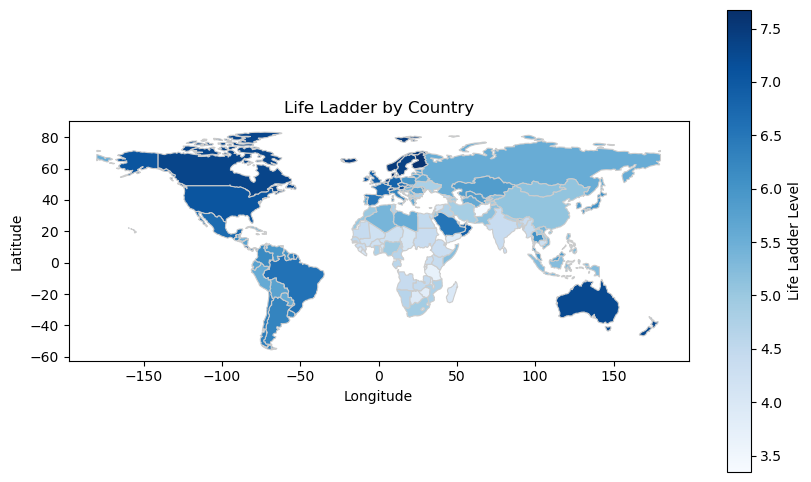

In [16]:
# life ladder levels by country
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Life Ladder', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': 'Life Ladder Level'})
ax.set_title('Life Ladder by Country') # 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Our visualization shows the average life ladder levels for each country from 2010 to 2020 on the global map, where the darker the shade of blue, the higher the life ladder is for that country. 

We can see that life ladder is unsurprisingly high for the North American, Western and North European countries, and Australia, since they are well-off countries with not much political or economic instabilities. Meanwhile, countries in Africa have very low levels of life ladders, which could have been through numerous factors but mainly in the economic and political aspect.

Suprisingly, we see South America with a fairly high life ladder, but overall, our life ladder levels reflect our perception of the economic and political situations of certain continents on the map.

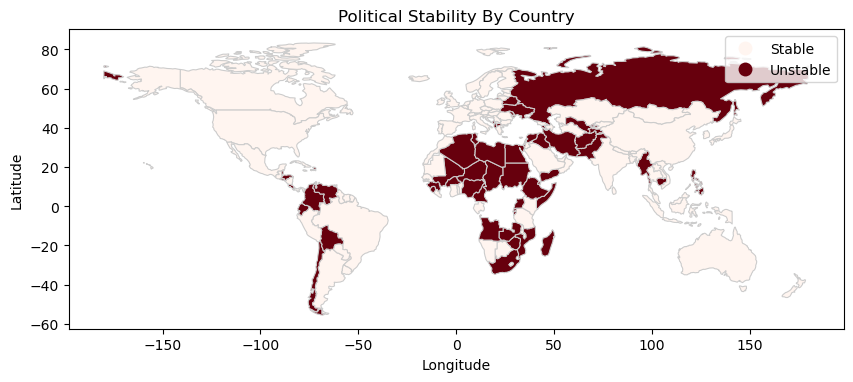

In [17]:
# political stability for each country
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='Internal Political Stability', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Political Stability By Country')
plt.show()

Our visualization shows the political stability of the country from 2010 to 2020 on the global map. This is a binary classification with just two results: A lighter red represents the country is stable, while the Darker country represents the country is unstable politically.

Interestingly enough, we see some South American countries under unstable political conditions, but these countries actually have relatively high life ladder levels as shown in our previous visualization. It does seem like 

Now, we will visualize using numerical rather than graphical analysis to delve deeper into whether political stability really affects life ladder levels.

In [18]:
# Average life ladder for stable and unstable countries
stable_avg = whr_final[whr_final['Political Stability'] == 'Stable'] # setting data to stable
print('Average Life Ladder for Stable Countries is:', stable_avg['Life Ladder'].mean()) # average life ladder for stable countries
unstable_avg = whr_final[whr_final['Political Stability'] == 'Unstable'] # setting data to unstable
print('Average Life Ladder for Unstable Countries is:', unstable_avg['Life Ladder'].mean()) # average life ladder for unstable countries

Average Life Ladder for Stable Countries is: 5.78752622903916

Average Life Ladder for Unstable Countries is: 4.869797393162393


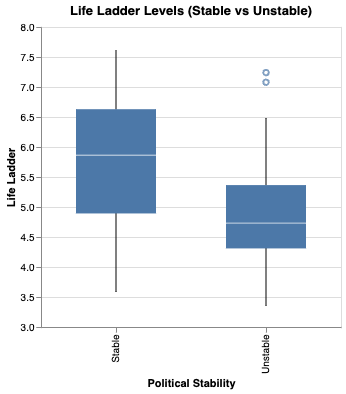

In [19]:
# boxplot distribution of stable and unstable countries across life ladder
boxplot = alt.Chart(whr_final).mark_boxplot(size=80).encode(
    x='Political Stability',
    y=alt.Y('Life Ladder', scale=alt.Scale(zero=False), title='Life Ladder'),
).properties(
    width=300,
    height=300,
    title='Life Ladder Levels (Stable vs Unstable)'
)

boxplot

Now that we created a statistical visualization, we see the median of a stable countries' life ladder is around 5.8, with 75% of those countries having life ladders between 4.89 to 6.63. On the other hand, we see a median life ladder level of unstable countries as 4.73, with 75% of these countries having life ladders between 4.31 and 7.24.

This is quite a big difference in Life Ladder levels based on the political stability of the country based on this boxplot, where stable countries have a higher life ladder level.

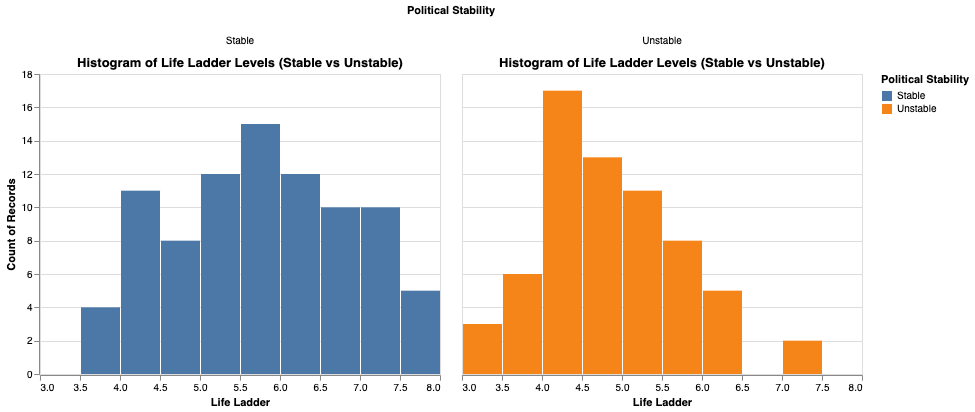

In [20]:
# histogram of life ladder for stable and unstable countries
histogram = alt.Chart(whr_final).mark_bar().encode(
    x=alt.X('Life Ladder', bin=alt.Bin(maxbins=20), title='Life Ladder'),
    y='count()',
    color='Political Stability:N'
)
# display both histograms by facet
histogram.properties(
    width=400,
    height=300,
    title='Histogram of Life Ladder Levels (Stable vs Unstable)'
).facet(
    column=alt.Column('Political Stability:N', title='Political Stability')
)

Our stable countries' histogram shows a normal-like distribution, with the center revolved around a life ladder between 5.5 to 6.0. However, for our unstable countries' histogram, we see a slightly right skewed distribution, with most of the countries between the 4.0 to 4.5 life level values. Once again, our visualization shows around a slightly higher life ladder level of stable countries than unstable countries.

Now, we will analyze each group (Stable vs Unstable) on its own and visualize their trends of life ladder levels vs the other variables in the dataset:

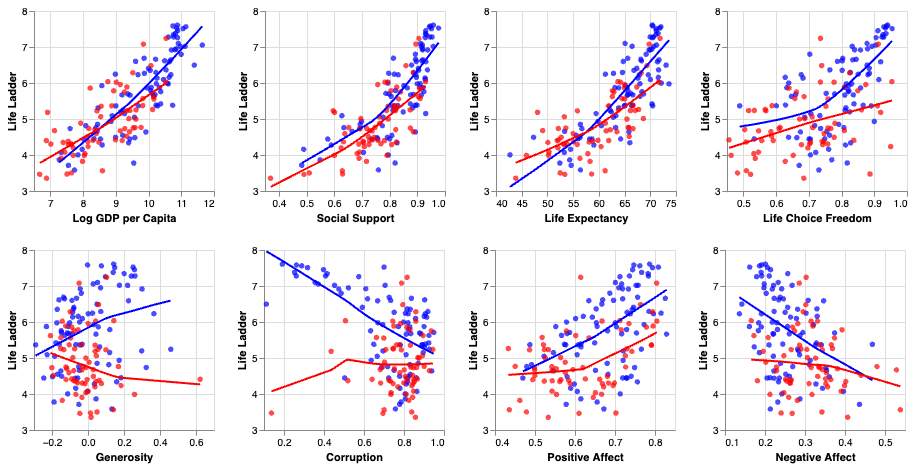

In [21]:
# categorizing data into stable and unstable countries
stable_data = whr_final[whr_final['Political Stability'] == 'Stable'] # stable countries data
unstable_data = whr_final[whr_final['Political Stability'] == 'Unstable'] # unstable countries data

# List of variables
variables = ['Log GDP per Capita', 'Social Support', 'Life Expectancy',
             'Life Choice Freedom', 'Generosity', 'Corruption',
             'Positive Affect', 'Negative Affect']

# Scatterplots and Line plots - stable and unstable countries
plots = []
for var in variables:
    scatter_stable = alt.Chart(stable_data).mark_circle().encode(
        x=alt.X(var, title=var, scale=alt.Scale(zero=False)),
        y=alt.Y('Life Ladder', title='Life Ladder', scale=alt.Scale(zero=False)),
        color=alt.ColorValue('blue')
    )
    
    scatter_unstable = alt.Chart(unstable_data).mark_circle().encode(
        x=alt.X(var, title=var, scale=alt.Scale(zero=False)),
        y=alt.Y('Life Ladder', title='Life Ladder', scale=alt.Scale(zero=False)),
        color=alt.ColorValue('red')
    )
    
    line_stable = alt.Chart(stable_data).transform_loess(
        var, 'Life Ladder', groupby=['Political Stability'], bandwidth=1
    ).mark_line().encode(
        x=alt.X(var, title=var),
        y=alt.Y('Life Ladder', title='Life Ladder'),
        color=alt.ColorValue('blue')
    )
    
    line_unstable = alt.Chart(unstable_data).transform_loess(
        var, 'Life Ladder', groupby=['Political Stability'], bandwidth=1
    ).mark_line().encode(
        x=alt.X(var, title=var),
        y=alt.Y('Life Ladder', title='Life Ladder'),
        color=alt.ColorValue('red')
    )
    
    plot = alt.layer(scatter_stable, scatter_unstable, line_stable, line_unstable).resolve_scale(color='independent').properties(
        width=180, height=180  # Adjust the width and height of each plot
    )
    plots.append(plot)

# Combine plots in a 2x4 matrix layout
grid_plots = alt.vconcat(*[alt.hconcat(*plots[i:i+4]) for i in range(0, len(plots), 4)])

# Display the grid of plots
grid_plots


**In this visualization, Blue represents Stable Country, and Red Represents Unstable Country.**

As seen in the scatterplots above, there seems to be a positive trend between **Life Ladder** and the following variables: **Log GDP per capita**, **social support**, **life expectancy** for both colors. This means that these variables affect life ladder levels regardless of political stability. For example, As the amount of Social Support increases, Life Ladder increases in both unstable and stable countries.

When comparing **Life Ladder** Levels to **Generosity** both colors have no trends as according to their scattered, non-linear point distribution. This means that **Generosity** doesn't have much of an affect on Life Ladder levels regardless of political stability.

When comparing **Life Ladder** Levels to **Corruption**, we don't see any relationship for the Unstable country, which means corruption levels have no effect on Life Ladder levels in Unstable countries. However, we see a big effect on stable countries as we see a decreasing trend of **Life Ladder** levels as **Corruption** increases for Stable countries. The same goes for **Negative Affect**, as there isn't much trends in unstable countries, but for stable countries, a **Negative Affect** increase decreases **Life Ladder** levels. This is the opposite vice versa for **Positive Affect** for stable countries (Higher **Positive Affect** = Higher **Life Ladder**), and again, not much trend for unstable countries.




Now, let's compare their correlations to see their differences in the heatmap:

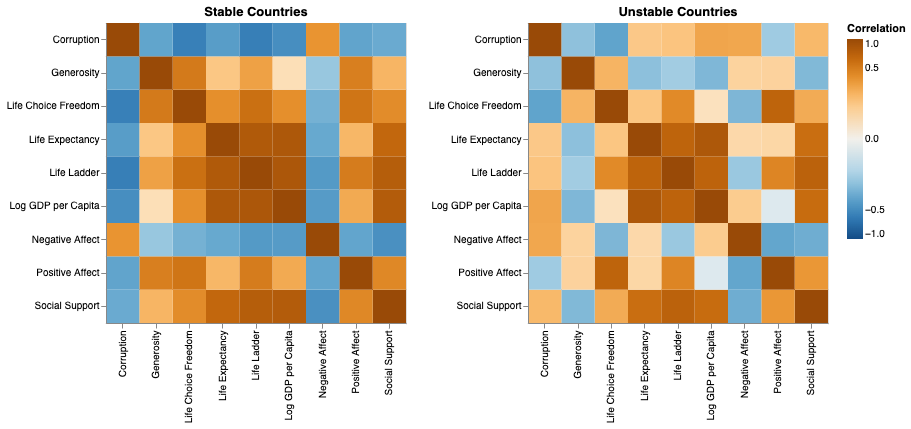

In [22]:
# heatmap of stable countries factors
# assessing correlations of numerical variables
corr_stable = stable_data.drop(columns = ['Country', 'Political Stability']).corr() # drop categorical variables, take correlation values

# melt
corr_stable_long = corr_stable.reset_index().rename(
    columns = {'index': 'row'}
).melt(
    id_vars = 'row',
    var_name = 'col',
    value_name = 'Correlation'
)

# heatmap of unstable countries factors
# assessing correlations of numerical variables
corr_unstable = unstable_data.drop(columns = ['Country', 'Political Stability']).corr() # drop categorical variables, take correlation values

# melt
corr_unstable_long = corr_unstable.reset_index().rename(
    columns = {'index': 'row'}
).melt(
    id_vars = 'row',
    var_name = 'col',
    value_name = 'Correlation'
)

# Construct heatmap plot for stable countries
h1 = alt.Chart(corr_stable_long).mark_rect().encode(
    x=alt.X('col', title=''),
    y=alt.Y('row', title=''),
    color=alt.Color('Correlation',
                    scale=alt.Scale(scheme='blueorange', domain=(-1, 1), type='sqrt'),
                    legend=alt.Legend(tickCount=5))
).properties(
    title='Stable Countries',  # Add title for h1
    width=300,
    height=300
)

# Construct heatmap plot for unstable countries
h2 = alt.Chart(corr_unstable_long).mark_rect().encode(
    x=alt.X('col', title=''),
    y=alt.Y('row', title=''),
    color=alt.Color('Correlation',
                    scale=alt.Scale(scheme='blueorange', domain=(-1, 1), type='sqrt'),
                    legend=alt.Legend(tickCount=5))
).properties(
    title='Unstable Countries',  # Add title for h2
    width=300,
    height=300
)

h1 | h2

The correlation heatmaps for both groups look significantly different in colors, so let's focus mainly on the Life Ladder correlations for both countries. We can see that Life Expectancy to **Corruption**, **Generosity** are opposite in correlations between Stable and Unstable. This supports our above plot, where we see opposite trends or no correlations in the unstable countries. The other variables have the same correlation sign for both stable and unstable.

# Regression

The goal of performing regression analysis in our context of our question of interest is to gain insights into the relationship between the factors that contribute to the well-being of individuals for both politically stable and unstable countries. By performing a multiple linear regression analysis, it allows us to quantify the impact of the independent variables on the dependent variable 'Life Ladder'. By examining the coefficients and statistical significance of these variables, we can assess their contributions to both stable and unstable countries.

In this analysis, we are specifically interested in understanding how factors such as Log GDP per Capita, Social Support, Life Expectancy, Life Choice Freedom, Generosity, perceptions of Corruption, and positive/negative affect may influence an individual's subjective well-being. By exploring the relationships between these variables and the "Life Ladder" measure, we aim to identify significant coefficient estimates and seek any differences between stable and unstable countries.

In [23]:
# mlr - stable countries
X1 = stable_data[['Log GDP per Capita', 'Social Support', 'Life Expectancy', 'Life Choice Freedom', 'Generosity', 'Corruption', 'Positive Affect', 'Negative Affect']]

# add constants to the design matrix
X1 = sm.add_constant(X1)
y1 = stable_data['Life Ladder']

# fit multiple linear regression model for stable countries
mlr_stable = sm.OLS(y1, X1)
rslt_stable = mlr_stable.fit()

# Create dataframe of coefficients and std error
coef_stable = pd.DataFrame({
    'estimate': rslt_stable.params,
    'std. error': np.sqrt(rslt_stable.cov_params().values.diagonal())
}, index = X1.columns.values
)

# Estimated Error variance
coef_stable.loc['Stable error variance', 'estimate'] = rslt_stable.scale



# mlr - unstable countries
X2 = unstable_data[['Log GDP per Capita', 'Social Support', 'Life Expectancy', 'Life Choice Freedom', 'Generosity', 'Corruption', 'Positive Affect', 'Negative Affect']]

# add constants to the design matrix
X2 = sm.add_constant(X2)
y2 = unstable_data['Life Ladder']

# fit multiple linear regression model for stable countries
mlr_unstable = sm.OLS(y2, X2)
rslt_unstable = mlr_unstable.fit()

# Create dataframe of coefficients and std error
coef_unstable = pd.DataFrame({
    'estimate2': rslt_unstable.params,
    'std. error2': np.sqrt(rslt_unstable.cov_params().values.diagonal())
}, index = X2.columns.values
)

# Estimated Error variance
coef_unstable.loc['Unstable error variance', 'estimate2'] = rslt_unstable.scale
both_tables = pd.concat([coef_stable, coef_unstable], axis = 1)

# Change column names for better look
new_column_names = {'estimate': 'Stable Coefficients', 'std. error': 'Stable std. error', 'estimate2': 'Unstable Coefficients', 'std. error2': 'Unstable std. error'}

# Rename columns based on the column index and reorder columns
both_tables = both_tables.rename(columns=new_column_names).loc[:,['Stable Coefficients', 'Unstable Coefficients', 'Stable std. error', 'Unstable std. error']]
both_tables

,Stable Coefficients,Unstable Coefficients,Stable std. error,Unstable std. error
const,-4.298304,-2.919448,0.882475,0.748194
Log GDP per Capita,0.297812,0.324973,0.101232,0.111064
Social Support,1.635917,1.379009,0.750224,0.836703
Life Expectancy,0.057539,0.028183,0.013031,0.015605
Life Choice Freedom,0.965367,1.113285,0.648428,0.657778
Generosity,0.083930,0.022160,0.364381,0.490370
Corruption,-0.844688,0.609323,0.310539,0.543247
Positive Affect,2.514196,2.047044,0.692054,0.816914
Negative Affect,0.754697,-0.741602,0.815180,0.895572
Stable error variance,0.169946,NaN,NaN,NaN


Comparing the results of the multiple linear regression analysis between stable and unstable countries, we can observe notable similarities and differences in the coefficient estimates for the independent variables. In terms of the most significant factors to **Life Ladder**, the variable **Positive Effect** was the most contributional towards the well being of individuals for both politically stable and unstable countries, and stable countries had a greater coefficient estimate. In similar fashion, the next two most significant factors for both stable and unstable countries are **Social Support** and **Life Choice Freedom**, meaning individuals who have positive perceptions of their country, receive support from friends and family, and believe to have freedoms to make their independent choices in life have impacts on higher well-being regardless of the political stability of the country. This makes sense, as these are highly colinear factors that can affect happiness regardless of anything else. 

There are some opposites in coeffecients between Stable and Unstable countries: **Corruption** and **Negative Affect**, 
* For **Corruption** in a Stable Country, the a higher average positive perception of their countries' corruption levels decreases the **Life Ladder**. However, surprisingly, in an Unstable Country, a higher average positive perception of their countries' corruption levels actually increases their **Ladder Level.** 
* For **Negative Affect**, a higher average negative perception of their whole country increases the **Life Ladder** of a stable country, but for unstable countries, decreases the **Life Ladder**. This could be due to the fact that individuals in stable countries have higher expectations of their country, and individuals in unstable countries have lower expectations of their country.
 
We can see that variables with small coefficients don't have much impact in shaping **Life Ladder** of a country. These following variables are: **Generosity**, **Life Expectancy**, and **Log GDP per Capita**. This applies for both politically stable and unstable countries. This is quite surprising, since GDP, Life Expectancy are key indicators in determining the economic status of a country.

# Summary of Findings

**Summary of Findings:** 

- The analysis examined the factors contributing to the Life Ladder (subjective well-being of the average individual) in politically stable and unstable countries from 2010 to 2020.
- Overall, there were notable similarities and differences in the factors that influenced Life Ladder between the two groups.
- Factors that positively impacted Life Ladder regardless of political stability were Social Support, Life Choice Freedom, and other positive perceptions.
- Positive Effect was the most influential factor in both stable and unstable countries, indicating that individuals' positive perceptions of their country significantly contribute to their well-being.
- Corruption showed contrasting effects: in stable countries, a higher positive perception of corruption decreased the Life Ladder, while in unstable countries, a higher positive perception of corruption increased the Life Ladder. This suggests that individuals in unstable countries may have lower expectations or different perspectives on corruption.
- Negative Affect had opposite effects as well: in stable countries, a higher negative perception of the country increased the Life Ladder, whereas in unstable countries, it decreased the Life Ladder. This could be attributed to varying expectations individuals have based on the stability of their country.
- Variables with smaller coefficients, such as Generosity, Life Expectancy, and Log GDP per Capita, had less impact on shaping the Life Ladder in both stable and unstable countries. This finding is surprising, considering the significance of these factors in determining a country's economic status.
- Overall, the regression analysis revealed distinct differences in the factors influencing Life Ladder between politically stable and unstable countries, emphasizing the complexity of subjective well-being and its relationship with various socio-economic factors.


**Conclusion:** 

These findings emphasize the well-being and the need to consider the specific political context of each country when analyzing and promoting happiness and overall quality of life globally. Political stability appears to play a significant role in shaping individuals' well-being, with the average individuals' opinions on their countries' positive perception, social support, and freedoms shaping their happiness levels. Understanding these distinctions can guide policymakers and organizations in developing targeted interventions and policies that address the unique challenges faced by politically unstable countries, aiming to improve well-being and promote stability. By recognizing the importance of political stability alongside other key factors, governments can work towards fostering happier, healthier, and more prosperous societies worldwide.